#  Simple Linear Regression

Q1) Delivery_Time -> Predict delivery time using sorting time

In [191]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [192]:
data=pd.read_csv("C:/Users/icon/Downloads/delivery_time.csv")

In [193]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [210]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

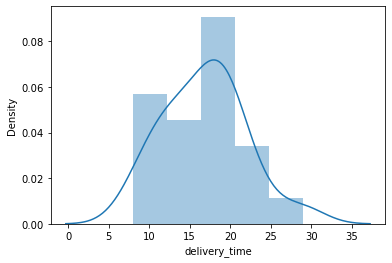

In [196]:
sns.distplot(data['delivery_time'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

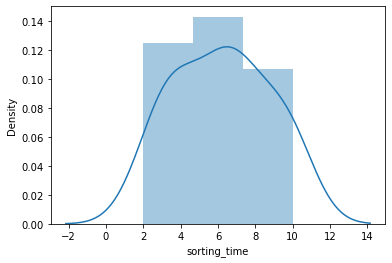

In [197]:
sns.distplot(data['sorting_time'])

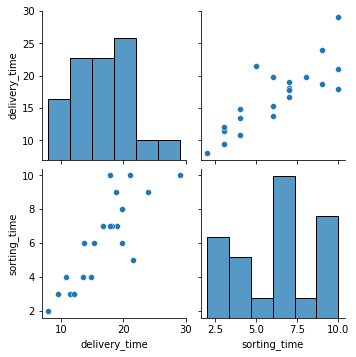

In [198]:
sns.pairplot(data)

In [199]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

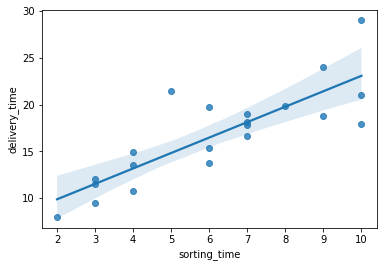

In [200]:
sns.regplot('sorting_time','delivery_time',data=data)

In [201]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [202]:
print(model.params,model.tvalues,model.pvalues)

Intercept       6.582734
sorting_time    1.649020
dtype: float64 Intercept       3.823349
sorting_time    6.387447
dtype: float64 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [203]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        19:35:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Fitting a Linear Regression Model

1. For y~x

In [204]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~sorting_time',data=data).fit()

In [205]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

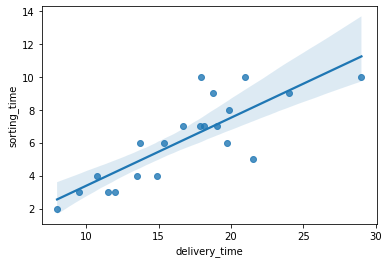

In [206]:
sns.regplot(x='delivery_time',y="sorting_time",data=data)

In [207]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [208]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [209]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [27]:
model.predict(data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

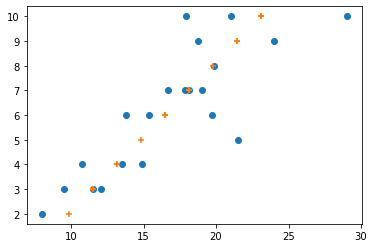

In [28]:
plt.scatter(data.delivery_time,data.sorting_time)
plt.scatter(model.predict(data),data.sorting_time,marker='+')
plt.show()

In [43]:
x=data.sorting_time
y=data.delivery_time

In [45]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~np.log(x)',data=data).fit()

In [46]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


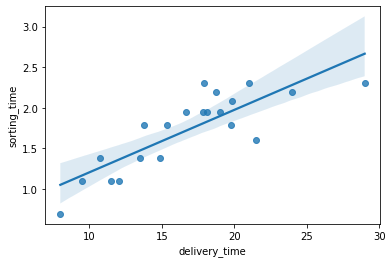

In [51]:
sns.regplot(x=y,y=np.log(x),data=data);

In [52]:
model.params

Intercept    1.159684
np.log(x)    9.043413
dtype: float64

In [53]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept    0.472460
np.log(x)    6.586789
dtype: float64 
 Intercept    0.641980
np.log(x)    0.000003
dtype: float64


In [54]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [55]:
model.predict(data)

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

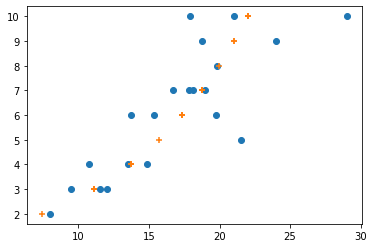

In [61]:
plt.scatter(data.delivery_time,data.sorting_time)
plt.scatter(model.predict(data),data.sorting_time,marker='+')
plt.show()

In [94]:
x=data.sorting_time
y=data.delivery_time

In [95]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~np.square(x)',data=data).fit()

In [96]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


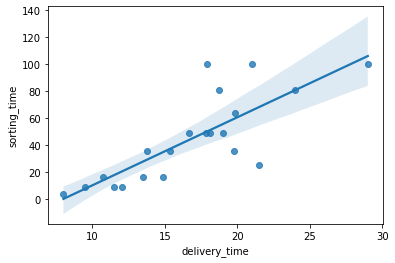

In [97]:
sns.regplot(x=y,y=np.square(x),data=data);

In [98]:
model.params

Intercept       11.237205
np.square(x)     0.124870
dtype: float64

In [99]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept       9.398601
np.square(x)    5.691330
dtype: float64 
 Intercept       1.415704e-08
np.square(x)    1.739194e-05
dtype: float64


In [100]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [101]:
model.predict(data)

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

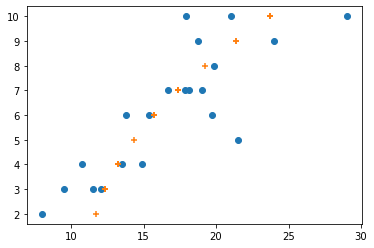

In [103]:
plt.scatter(data.delivery_time,data.sorting_time)
plt.scatter(model.predict(data),data.sorting_time,marker='+')
plt.show()

In [104]:
x=data.sorting_time
y=data.delivery_time

In [105]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~np.power(x,3)',data=data).fit()

In [106]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


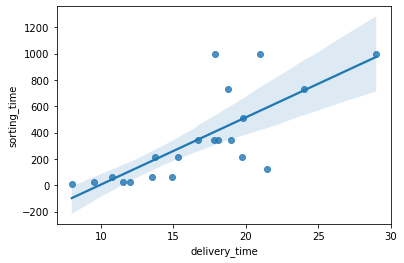

In [107]:
sns.regplot(x=y,y=np.power(x,3),data=data);

In [108]:
model.params

Intercept         12.868192
np.power(x, 3)     0.011138
dtype: float64

In [109]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept         11.89017
np.power(x, 3)     5.00458
dtype: float64 
 Intercept         3.025690e-10
np.power(x, 3)    7.869103e-05
dtype: float64


In [110]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.5686309930618971, 0.5459273611177865)

In [111]:
model.predict(data)

0     24.006370
1     13.581036
2     15.274039
3     20.987924
4     24.006370
5     15.274039
6     16.688587
7     13.168923
8     24.006370
9     20.987924
10    18.570939
11    13.581036
12    16.688587
13    13.168923
14    13.168923
15    13.581036
16    15.274039
17    16.688587
18    12.957298
19    16.688587
20    14.260465
dtype: float64

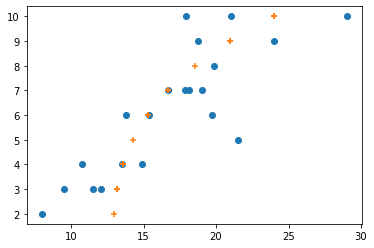

In [112]:
plt.scatter(data.delivery_time,data.sorting_time)
plt.scatter(model.predict(data),data.sorting_time,marker='+')
plt.show()

In [214]:
x=data.sorting_time
y=data.delivery_time

In [222]:
import statsmodels.formula.api as smf
model=smf.ols('np.log(y)~np.log(x)',data=data).fit()

In [223]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


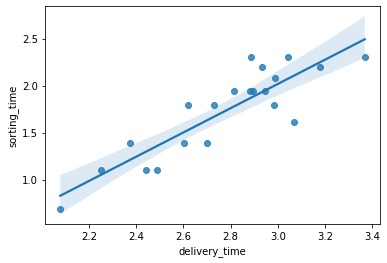

In [224]:
sns.regplot(x=np.log(y),y=np.log(x),data=data);

In [225]:
model.params

Intercept    1.741987
np.log(x)    0.597522
dtype: float64

In [226]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept    13.085552
np.log(x)     8.024484
dtype: float64 
 Intercept    5.921137e-11
np.log(x)    1.601539e-07
dtype: float64


In [227]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [242]:
np.exp(model.predict(data))

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

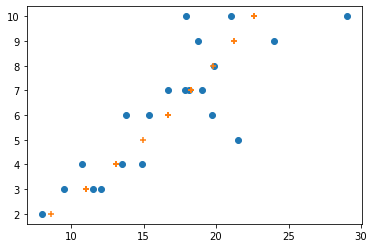

In [245]:
plt.scatter(data.delivery_time,data.sorting_time)
plt.scatter(np.exp(model.predict(data)),data.sorting_time,marker='+')
plt.show()

Q2) Salary_hike-> Build a prediction model for Salary hike

In [142]:
salary=pd.read_csv("C:/Users/icon/Downloads/Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [143]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [144]:
salary=salary.rename({'YearsExperience':'years_experience','Salary':'salary'},axis=1)
salary

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='years_experience', ylabel='Density'>

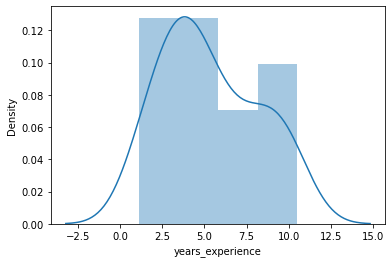

In [145]:
sns.distplot(salary['years_experience'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

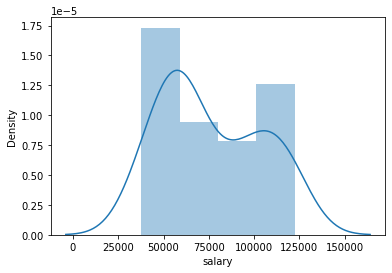

In [146]:
sns.distplot(salary['salary'])

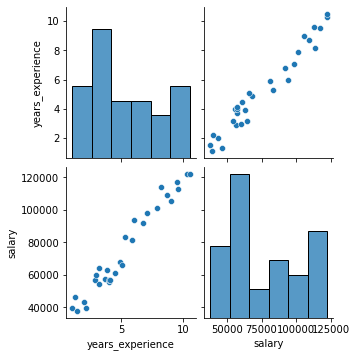

In [147]:
sns.pairplot(salary)

In [148]:
salary.corr()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='years_experience'>

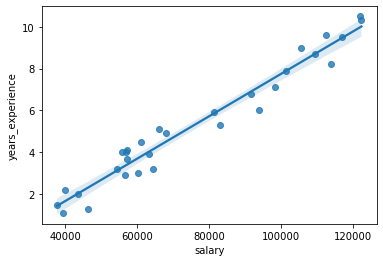

In [149]:
sns.regplot('salary','years_experience',data=salary)

In [150]:
import statsmodels.formula.api as smf
model=smf.ols("salary~years_experience",data=salary).fit()

In [151]:
print(model.params,model.tvalues,model.pvalues)

Intercept           25792.200199
years_experience     9449.962321
dtype: float64 Intercept           11.346940
years_experience    24.950094
dtype: float64 Intercept           5.511950e-12
years_experience    1.143068e-20
dtype: float64


In [152]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        19:04:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Fitting a Linear Regression Model

1. For y~x

In [154]:
import statsmodels.formula.api as smf
model=smf.ols('salary~years_experience',data=salary).fit()

In [156]:
salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='salary', ylabel='years_experience'>

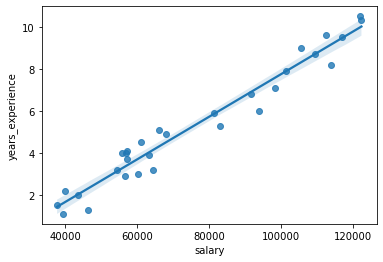

In [158]:
sns.regplot(x='salary',y="years_experience",data=salary)

In [159]:
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [160]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept           11.346940
years_experience    24.950094
dtype: float64 
 Intercept           5.511950e-12
years_experience    1.143068e-20
dtype: float64


In [161]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [163]:
model.predict(salary)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

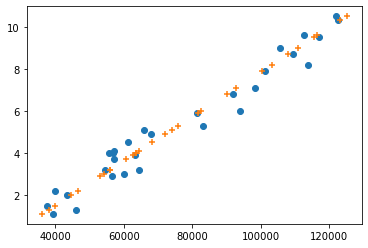

In [164]:
plt.scatter(salary.salary,salary.years_experience)
plt.scatter(model.predict(salary),salary.years_experience,marker='+')
plt.show()

In [165]:
x=salary.years_experience
y=salary.salary

In [166]:
import statsmodels.formula.api as smf
model=smf.ols('salary~np.log(x)',data=salary).fit()

In [167]:
salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


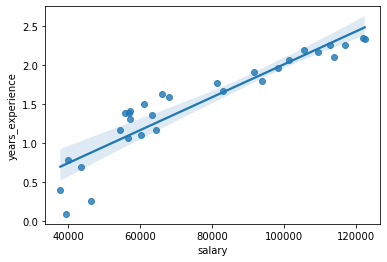

In [168]:
sns.regplot(x=y,y=np.log(x),data=data);

In [169]:
model.params

Intercept    14927.97177
np.log(x)    40581.98796
dtype: float64

In [170]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept     2.895135
np.log(x)    12.791989
dtype: float64 
 Intercept    7.268813e-03
np.log(x)    3.250155e-13
dtype: float64


In [171]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [172]:
model.predict(salary)

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

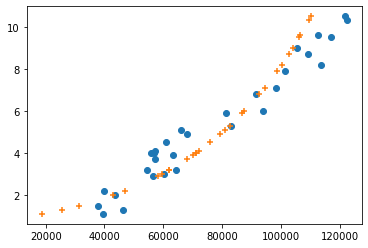

In [173]:
plt.scatter(salary.salary,salary.years_experience)
plt.scatter(model.predict(salary),salary.years_experience,marker='+')
plt.show()

In [174]:
x=salary.years_experience
y=salary.salary

In [95]:
import statsmodels.formula.api as smf
model=smf.ols('salary~np.square(x)',data=salary).fit()

In [175]:
salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


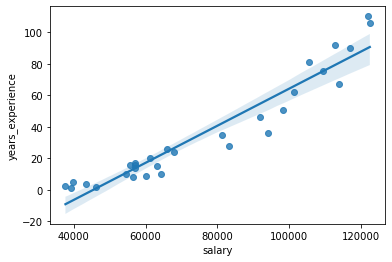

In [176]:
sns.regplot(x=y,y=np.square(x),data=salary);

In [177]:
model.params

Intercept    14927.97177
np.log(x)    40581.98796
dtype: float64

In [178]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept     2.895135
np.log(x)    12.791989
dtype: float64 
 Intercept    7.268813e-03
np.log(x)    3.250155e-13
dtype: float64


In [179]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [180]:
model.predict(salary)

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

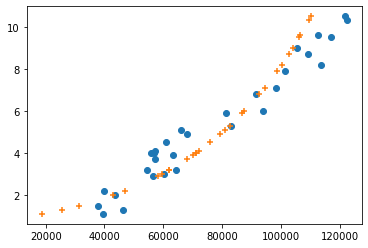

In [181]:
plt.scatter(salary.salary,salary.years_experience)
plt.scatter(model.predict(salary),salary.years_experience,marker='+')
plt.show()

In [182]:
x=salary.years_experience
y=salary.salary

In [183]:
import statsmodels.formula.api as smf
model=smf.ols('salary~np.power(x,3)',data=salary).fit()

In [184]:
salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


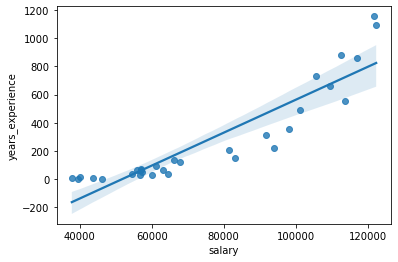

In [185]:
sns.regplot(x=y,y=np.power(x,3),data=salary);

In [186]:
model.params

Intercept         55911.623915
np.power(x, 3)       71.264833
dtype: float64

In [187]:
#t and p-values 
print(model.tvalues,'\n',model.pvalues)

Intercept         20.887108
np.power(x, 3)    11.870804
dtype: float64 
 Intercept         1.295610e-18
np.power(x, 3)    1.922328e-12
dtype: float64


In [188]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8342371274125908, 0.8283170248201833)

In [189]:
model.predict(salary)

0      56006.477408
1      56068.192753
2      56152.142727
3      56481.742580
4      56670.451858
5      57649.701930
6      57835.774409
7      58246.829967
8      58246.829967
9      59521.401507
10     60138.982551
11     60472.573235
12     60472.573235
13     60823.267478
14     62405.631833
15     64295.860267
16     65364.975293
17     66521.318475
18     70547.924076
19     71304.827869
20     78319.567922
21     81418.091601
22     91047.965971
23     95204.772422
24    102839.730318
25    107863.687259
26    117012.310210
27    118962.187309
28    133784.631214
29    138409.576354
dtype: float64

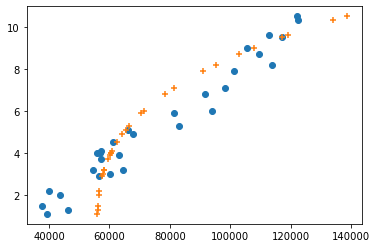

In [190]:
plt.scatter(salary.salary,salary.years_experience)
plt.scatter(model.predict(salary),salary.years_experience,marker='+')
plt.show()